In [1]:
# Dependencies and Setup.
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key.
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude.
from citipy import citipy

In [2]:
# Empty list for holding the latitude and longitude combinations.
lat_lngs = []

# Empty list for holding the cities names.
cities = []

# Range of latitudes and longitudes.
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations.
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination.
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to our cities list.
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count.
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 660


# Create Plots to Showcase the Relationship Between Weather Variables and Latitude

In [3]:
# Set the API base URL.
url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric"

# Define an empty list to fetch the weather data for each city.
city_data = []

# Print to logger.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data.
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city.
    city_url = f"{url}&q={city}"
    
    # Log the url, record, and set numbers.
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list.
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kahului
Processing Record 2 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 3 of Set 1 | foix
Processing Record 4 of Set 1 | byron bay
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | amderma
City not found. Skipping...
Processing Record 7 of Set 1 | nikolskoye
Processing Record 8 of Set 1 | kalengwa
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | calabozo
Processing Record 11 of Set 1 | egvekinot
Processing Record 12 of Set 1 | ribeira grande
Processing Record 13 of Set 1 | bluff
Processing Record 14 of Set 1 | hervey bay
Processing Record 15 of Set 1 | barrow
Processing Record 16 of Set 1 | dudinka
Processing Record 17 of Set 1 | khatanga
Processing Record 18 of Set 1 | vaini
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | bambous virieux
Processing Record 21 of Set 1 | millinocket
Processing Record 22 o

Processing Record 34 of Set 4 | kerema
Processing Record 35 of Set 4 | palembang
Processing Record 36 of Set 4 | san vicente
Processing Record 37 of Set 4 | paraiso
Processing Record 38 of Set 4 | ugoofaaru
Processing Record 39 of Set 4 | beyneu
Processing Record 40 of Set 4 | turinsk
Processing Record 41 of Set 4 | shache
Processing Record 42 of Set 4 | avera
Processing Record 43 of Set 4 | bilibino
Processing Record 44 of Set 4 | balkanabat
Processing Record 45 of Set 4 | palmer
Processing Record 46 of Set 4 | saleaula
City not found. Skipping...
Processing Record 47 of Set 4 | sorkjosen
Processing Record 48 of Set 4 | nisia floresta
Processing Record 49 of Set 4 | waddan
Processing Record 0 of Set 5 | karkaralinsk
City not found. Skipping...
Processing Record 1 of Set 5 | kaitangata
Processing Record 2 of Set 5 | port hawkesbury
Processing Record 3 of Set 5 | vanimo
Processing Record 4 of Set 5 | angra
City not found. Skipping...
Processing Record 5 of Set 5 | puerto maldonado
Proce

Processing Record 20 of Set 8 | patos de minas
Processing Record 21 of Set 8 | berdigestyakh
Processing Record 22 of Set 8 | canora
Processing Record 23 of Set 8 | vrede
Processing Record 24 of Set 8 | dalnerechensk
Processing Record 25 of Set 8 | kohima
Processing Record 26 of Set 8 | emet
Processing Record 27 of Set 8 | labutta
City not found. Skipping...
Processing Record 28 of Set 8 | sistranda
Processing Record 29 of Set 8 | mayo
Processing Record 30 of Set 8 | nome
Processing Record 31 of Set 8 | severo-yeniseyskiy
Processing Record 32 of Set 8 | kirensk
Processing Record 33 of Set 8 | key largo
Processing Record 34 of Set 8 | catamarca
Processing Record 35 of Set 8 | warmbad
Processing Record 36 of Set 8 | moron
Processing Record 37 of Set 8 | los llanos de aridane
Processing Record 38 of Set 8 | itaituba
Processing Record 39 of Set 8 | baykit
Processing Record 40 of Set 8 | raudeberg
Processing Record 41 of Set 8 | oudtshoorn
Processing Record 42 of Set 8 | bonnyville
Processin

Processing Record 8 of Set 12 | alice springs
Processing Record 9 of Set 12 | canutama
Processing Record 10 of Set 12 | sept-iles
Processing Record 11 of Set 12 | ixtapa
Processing Record 12 of Set 12 | borzya
Processing Record 13 of Set 12 | qandala
Processing Record 14 of Set 12 | nuuk
Processing Record 15 of Set 12 | asyut
Processing Record 16 of Set 12 | fredericton
Processing Record 17 of Set 12 | colac
Processing Record 18 of Set 12 | bundaberg
Processing Record 19 of Set 12 | rameshki
Processing Record 20 of Set 12 | xining
Processing Record 21 of Set 12 | bengkalis
City not found. Skipping...
Processing Record 22 of Set 12 | north platte
Processing Record 23 of Set 12 | henderson
Processing Record 24 of Set 12 | methoni
Processing Record 25 of Set 12 | beboto
Processing Record 26 of Set 12 | bandarbeyla
Processing Record 27 of Set 12 | viramgam
Processing Record 28 of Set 12 | ostrovnoy
Processing Record 29 of Set 12 | huarmey
Processing Record 30 of Set 12 | verkhnyaya inta
Pr

In [4]:
# Convert the cities weather data into a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)

# Show Record Count.
city_data_df.count()

City          602
Lat           602
Lng           602
Max Temp      602
Humidity      602
Cloudiness    602
Wind Speed    602
Country       602
Date          602
dtype: int64

In [5]:
# Display sample data.
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kahului,20.8947,-156.4700,22.69,88,40,2.06,US,1675446946
1,foix,42.8333,1.5833,5.11,74,18,2.41,FR,1675446947
2,byron bay,-28.6500,153.6167,24.41,85,15,1.46,AU,1675446937
3,rikitea,-23.1203,-134.9692,25.63,71,71,4.68,PF,1675446948
4,nikolskoye,59.7035,30.7861,-4.01,96,100,2.38,RU,1675446948


In [6]:
# Export the City_Data into a csv.
city_data_df.to_csv("output_data/cities.csv", index_label = "City_ID")

In [2]:
# Read saved data.
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data.
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kahului,20.8947,-156.4700,22.69,88,40,2.06,US,1675446946
1,foix,42.8333,1.5833,5.11,74,18,2.41,FR,1675446947
2,byron bay,-28.6500,153.6167,24.41,85,15,1.46,AU,1675446937
3,rikitea,-23.1203,-134.9692,25.63,71,71,4.68,PF,1675446948
4,nikolskoye,59.7035,30.7861,-4.01,96,100,2.38,RU,1675446948


## Latitude vs. Temperature

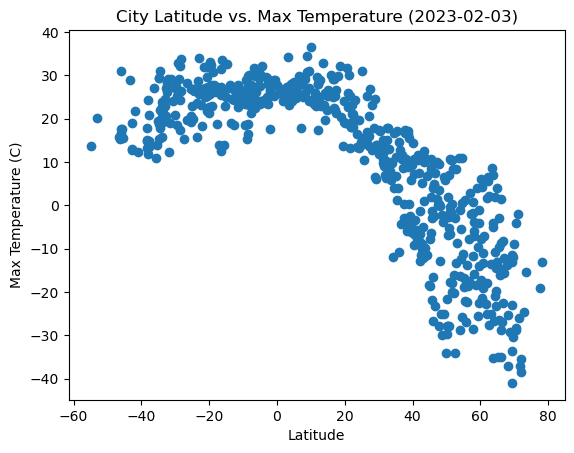

In [3]:
# Build scatter plot for latitude vs. temperature.
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"])

# Incorporate the other graph properties.
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude vs. Max Temperature (2023-02-03)")

# Save the figure.
plt.savefig("output_data/Fig1.png")

# Show plot.
plt.show()

## Latitude vs. Humidity

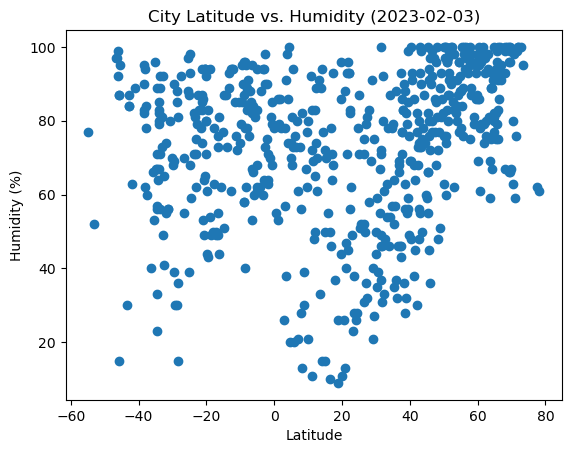

In [4]:
# Build scatter plot for latitude vs. temperature.
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"])

# Incorporate the other graph properties.
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2023-02-03)")

# Save the figure.
plt.savefig("output_data/Fig2.png")

# Show plot.
plt.show()

## Latitude vs. Cloudiness

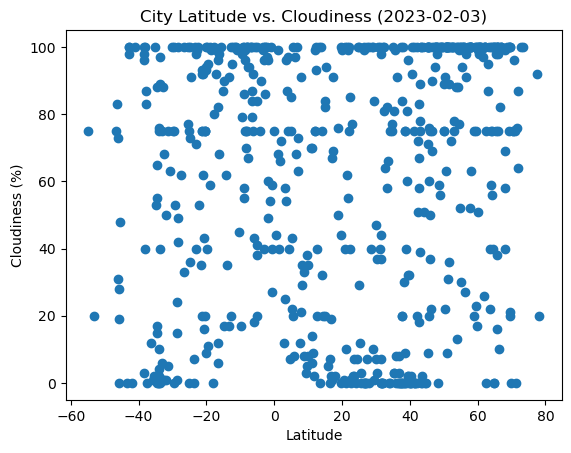

In [5]:
# Build scatter plot for latitude vs. temperature.
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"])

# Incorporate the other graph properties.
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (2023-02-03)")

# Save the figure.
plt.savefig("output_data/Fig3.png")

# Show plot.
plt.show()

## Latitude vs. Wind Speed

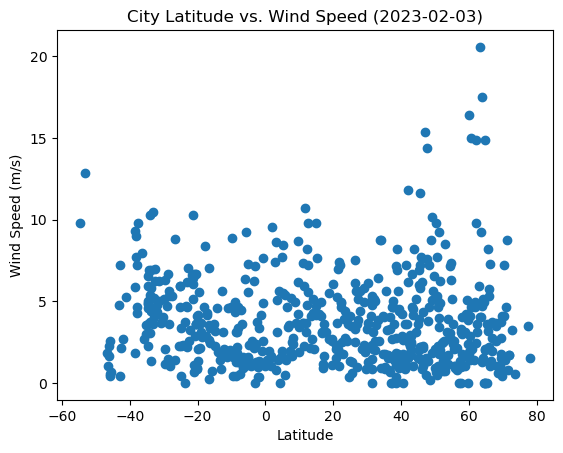

In [6]:
# Build scatter plot for latitude vs. temperature.
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"])

# Incorporate the other graph properties.
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2023-02-03)")

# Save the figure.
plt.savefig("output_data/Fig4.png")

# Show plot.
plt.show()

# Compute Linear Regression for Each Relationship

In [7]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0).
northern_hemi_df = city_data_df[city_data_df["Lat"] > 0]

# Display sample data.
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kahului,20.8947,-156.4700,22.69,88,40,2.06,US,1675446946
1,foix,42.8333,1.5833,5.11,74,18,2.41,FR,1675446947
4,nikolskoye,59.7035,30.7861,-4.01,96,100,2.38,RU,1675446948
7,calabozo,8.9242,-67.4293,34.40,30,8,3.65,VE,1675446950
8,egvekinot,66.3167,-179.1667,-26.92,86,10,7.26,RU,1675446950


In [8]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0).
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data.
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,byron bay,-28.6500,153.6167,24.41,85,15,1.46,AU,1675446937
3,rikitea,-23.1203,-134.9692,25.63,71,71,4.68,PF,1675446948
5,kalengwa,-13.4659,25.0027,19.02,93,91,1.42,ZM,1675446949
6,ushuaia,-54.8000,-68.3000,13.81,77,75,9.77,AR,1675446949
10,bluff,-46.6000,168.3333,15.80,97,75,1.83,NZ,1675446952


## Latitude vs. Temperature Linear Regression Plot

The r-value is: 0.7195988634376119


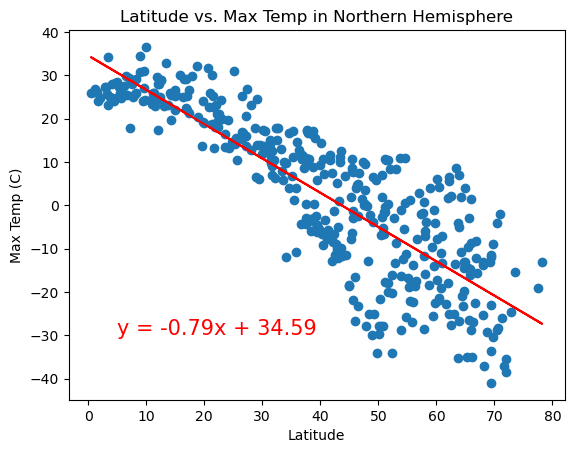

In [9]:
# Linear regression on Northern Hemisphere.
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
regress_values = northern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
plt.plot(northern_hemi_df["Lat"], regress_values, "r-")
plt.annotate(line_eq, (5, -30), fontsize = 15, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
plt.title("Latitude vs. Max Temp in Northern Hemisphere")
print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.2110063506179978


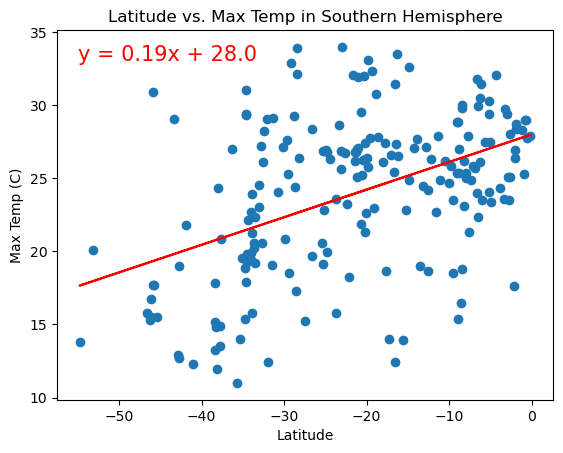

In [10]:
# Linear regression on Southern Hemisphere.
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
regress_values = southern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
plt.plot(southern_hemi_df["Lat"], regress_values, "r-")
plt.annotate(line_eq, (-55, 33), fontsize = 15, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
plt.title("Latitude vs. Max Temp in Southern Hemisphere")
print(f"The r-value is: {rvalue**2}")
plt.show()

#### Discussion about the linear relationship: For the Northern Hemisphere, there is a strong negative correlation between latitude and max temperature. So the greater the latitude is, the colder it is. For the Southern Hemisphere, there is a positive correlation between latitude and max temperature, albeit a weak one. As the latitude lines get closer to the equator, the temperature somewhat seems to get higher.

## Latitude vs. Humidity Linear Regression Plot

The r-value is: 0.2209414069677508


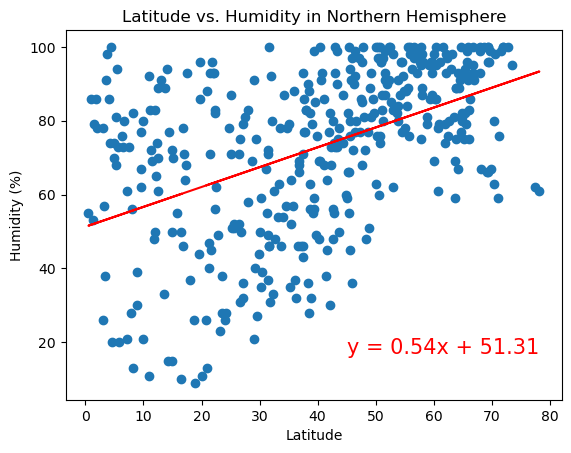

In [11]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
regress_values = northern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
plt.plot(northern_hemi_df["Lat"], regress_values, "r-")
plt.annotate(line_eq, (45, 17), fontsize = 15, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Latitude vs. Humidity in Northern Hemisphere")
print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.013391924985814893


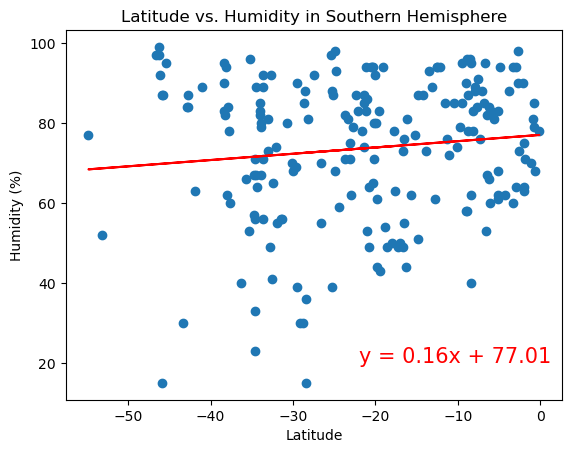

In [12]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
regress_values = southern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
plt.plot(southern_hemi_df["Lat"], regress_values, "r-")
plt.annotate(line_eq, (-22, 20), fontsize = 15, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Latitude vs. Humidity in Southern Hemisphere")
print(f"The r-value is: {rvalue**2}")
plt.show()

#### Discussion about the linear relationship: In the Northern Hemisphere, there seems to be a weak positive correlation between latitude and humidity. Therefore, the higher northern latitudes are possibly slightly more humid. In the Southern Hemisphere, there is no correlation between latitude and humidity.

## Latitude vs. Cloudiness Linear Regression Plot

The r-value is: 0.09260498223152257


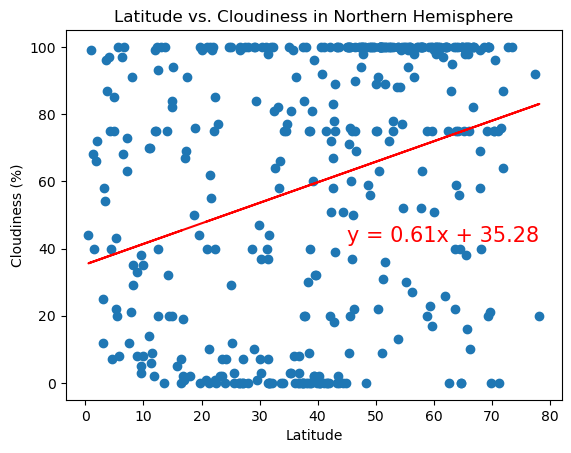

In [13]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
regress_values = northern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
plt.plot(northern_hemi_df["Lat"], regress_values, "r-")
plt.annotate(line_eq, (45, 42), fontsize = 15, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Latitude vs. Cloudiness in Northern Hemisphere")
print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.1031919700146193


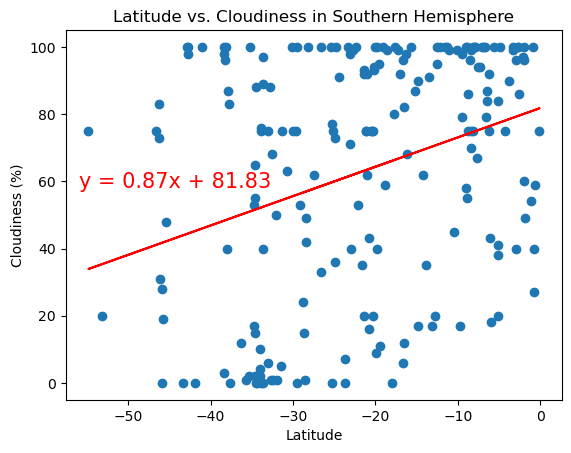

In [14]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
regress_values = southern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
plt.plot(southern_hemi_df["Lat"], regress_values, "r-")
plt.annotate(line_eq, (-56, 58), fontsize = 15, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Latitude vs. Cloudiness in Southern Hemisphere")
print(f"The r-value is: {rvalue**2}")
plt.show()

#### Discussion about the linear relationship: Each Hemisphere has an r-value of about 0.10. This means that they both have very weak positive correlations between latitude and cloudiness. The correlations are negligible.

## Latitude vs. Wind Speed Linear Regression Plot

The r-value is: 0.00027587111054268093


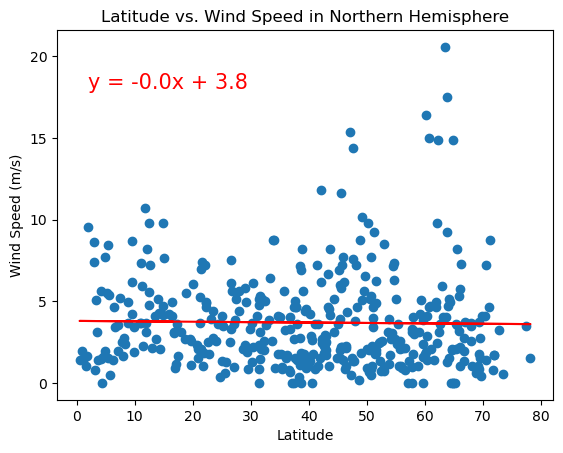

In [15]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
regress_values = northern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
plt.plot(northern_hemi_df["Lat"], regress_values, "r-")
plt.annotate(line_eq, (2, 18), fontsize = 15, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("Latitude vs. Wind Speed in Northern Hemisphere")
print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.0943658388006792


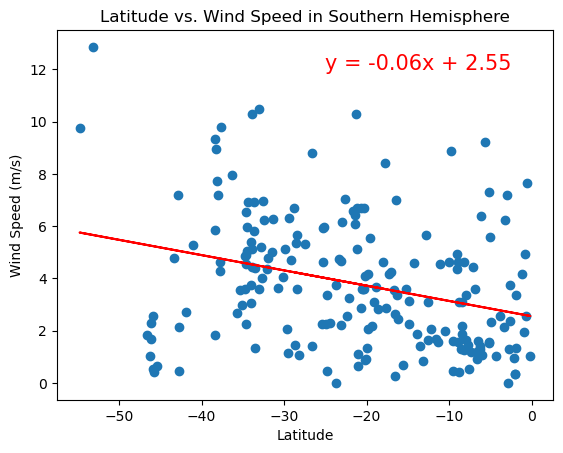

In [16]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
regress_values = southern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
plt.plot(southern_hemi_df["Lat"], regress_values, "r-")
plt.annotate(line_eq, (-25, 12), fontsize = 15, color = "red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("Latitude vs. Wind Speed in Southern Hemisphere")
print(f"The r-value is: {rvalue**2}")
plt.show()

#### Discussion about the linear relationship: The Northern Hemisphere has absolutely no correlation between latitude and wind speed. In the Southern Hemisphere, there is a very weak negative correlation between the two variables.